In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

%matplotlib inline


In [2]:
data = pd.read_csv('only_month_to_month.csv')

In [3]:
data.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),$56.05,...,False,False,True,3.0,20211026,$0.00,False,2 Year,No Phone Service,DSL
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,$20.00,...,NaN,NaN,NaN,NaN,20211026,$0.00,False,2 Year,One Line,No Internet Service
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),$61.90,...,NaN,NaN,NaN,NaN,20211026,$0.00,False,2 Year,Two or More Lines,DSL
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,$19.70,...,NaN,NaN,NaN,NaN,20211026,$0.00,False,1 Year,One Line,No Internet Service
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,$20.25,...,NaN,NaN,NaN,NaN,20211026,$0.00,False,2 Year,One Line,No Internet Service


In [4]:
data.shape

(7043, 30)

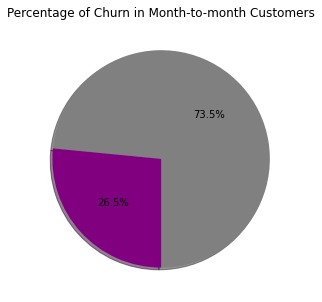

In [5]:
# Current churn rate
sizes = data['churn'].value_counts(sort = True)
colors = ['grey', 'purple']
rcParams['figure.figsize']=5,5

plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)

plt.title('Percentage of Churn in Month-to-month Customers')
plt.show();

In [6]:
#Remove data irrelevant to correlation
data.drop('customer_id', axis=1, inplace=True)

In [7]:
#Clean data, define proper dtypes
data.dtypes


gender                          object
is_senior_citizen                int64
partner                         object
dependents                      object
phone_service                    int64
internet_service                 int64
contract_type                    int64
payment_type                    object
monthly_charges                 object
total_charges                   object
churn                           object
tenure                           int64
is_female                         bool
has_churned                       bool
has_phone                         bool
has_internet                      bool
has_phone_and_internet            bool
partner_dependents               int64
no_partners_no_dependents       object
no_dependents_yes_partners      object
dependents_no_partners          object
yes_dependents_and_partners     object
Unnamed: 23                    float64
start_date                       int64
average_monthly_charges         object
validate_monthly_charges 

In [8]:
# Convert types
data['monthly_charges']=data['monthly_charges'].str.replace('$','')
data['monthly_charges']=data['monthly_charges'].str.replace(',','').astype(float)
data['total_charges']=data['total_charges'].str.replace('$','')
data['total_charges']=data['total_charges'].str.replace(',','').astype(float)

In [9]:
data.dtypes

gender                          object
is_senior_citizen                int64
partner                         object
dependents                      object
phone_service                    int64
internet_service                 int64
contract_type                    int64
payment_type                    object
monthly_charges                float64
total_charges                  float64
churn                           object
tenure                           int64
is_female                         bool
has_churned                       bool
has_phone                         bool
has_internet                      bool
has_phone_and_internet            bool
partner_dependents               int64
no_partners_no_dependents       object
no_dependents_yes_partners      object
dependents_no_partners          object
yes_dependents_and_partners     object
Unnamed: 23                    float64
start_date                       int64
average_monthly_charges         object
validate_monthly_charges 

In [11]:
data.contract_type_desc.head(50)

0             2 Year
1             2 Year
2             2 Year
3             1 Year
4             2 Year
5             2 Year
6             2 Year
7             2 Year
8             2 Year
9             2 Year
10            2 Year
11            1 Year
12    Month-to-Month
13    Month-to-Month
14    Month-to-Month
15    Month-to-Month
16    Month-to-Month
17            2 Year
18            2 Year
19    Month-to-Month
20            2 Year
21            2 Year
22            2 Year
23    Month-to-Month
24            2 Year
25            2 Year
26            2 Year
27            1 Year
28    Month-to-Month
29            1 Year
30    Month-to-Month
31            1 Year
32    Month-to-Month
33    Month-to-Month
34    Month-to-Month
35    Month-to-Month
36    Month-to-Month
37            1 Year
38            2 Year
39            1 Year
40            2 Year
41            1 Year
42            1 Year
43            1 Year
44            1 Year
45            2 Year
46            2 Year
47    Month-t

In [13]:
#filter only month to month
data =data[data.contract_type_desc=='Month-to-Month']

In [14]:
data.sample(20)

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
411,Male,0,Yes,Yes,2,2,0,Electronic check,91.80,5960.50,...,NaN,NaN,NaN,NaN,20160530,$91.80,True,Month-to-Month,Two or More Lines,Fiber Optic
5177,Male,1,No,No,2,2,0,Electronic check,80.50,2088.45,...,NaN,NaN,NaN,NaN,20190828,$80.50,True,Month-to-Month,Two or More Lines,Fiber Optic
5015,Male,0,No,No,1,0,0,Mailed check,20.00,417.70,...,NaN,NaN,NaN,NaN,20200129,$20.00,True,Month-to-Month,One Line,No Internet Service
2129,Female,0,No,No,0,1,0,Credit card (automatic),34.80,113.95,...,NaN,NaN,NaN,NaN,20210718,$34.80,True,Month-to-Month,No Phone Service,DSL
237,Female,0,Yes,No,2,2,0,Credit card (automatic),102.10,5885.40,...,NaN,NaN,NaN,NaN,20170106,$102.10,True,Month-to-Month,Two or More Lines,Fiber Optic
3716,Male,0,No,No,1,2,0,Electronic check,85.75,2146.50,...,NaN,NaN,NaN,NaN,20190925,$85.75,True,Month-to-Month,One Line,Fiber Optic
1232,Male,0,Yes,Yes,2,1,0,Electronic check,67.60,2000.20,...,NaN,NaN,NaN,NaN,20190510,$67.60,True,Month-to-Month,Two or More Lines,DSL
2049,Female,0,No,Yes,2,1,0,Electronic check,64.80,1166.70,...,NaN,NaN,NaN,NaN,20200426,$64.80,True,Month-to-Month,Two or More Lines,DSL
3825,Female,0,No,No,1,2,0,Electronic check,70.60,70.60,...,NaN,NaN,NaN,NaN,20210925,$70.60,True,Month-to-Month,One Line,Fiber Optic
2250,Male,1,Yes,No,2,2,0,Bank transfer (automatic),95.25,5427.05,...,NaN,NaN,NaN,NaN,20170126,$95.25,True,Month-to-Month,Two or More Lines,Fiber Optic


In [15]:
data.shape

(3875, 29)

In [16]:
data.dtypes

gender                          object
is_senior_citizen                int64
partner                         object
dependents                      object
phone_service                    int64
internet_service                 int64
contract_type                    int64
payment_type                    object
monthly_charges                float64
total_charges                  float64
churn                           object
tenure                           int64
is_female                         bool
has_churned                       bool
has_phone                         bool
has_internet                      bool
has_phone_and_internet            bool
partner_dependents               int64
no_partners_no_dependents       object
no_dependents_yes_partners      object
dependents_no_partners          object
yes_dependents_and_partners     object
Unnamed: 23                    float64
start_date                       int64
average_monthly_charges         object
validate_monthly_charges 